In [1]:
#import tensorflow as tf
#from keras.backend.tensorflow_backend import set_session

#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
#sess = tf.Session(config=config)
#set_session(sess)

In [2]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)#

    except RuntimeError as e:
        print(e)
        


In [3]:
"""

This is for morphological classification of galaxies by CNN,
By Kenji Bekki, on 2017/11/15
Revised on 2020/2/14 (Nair & Abraham 2010)
For test only.

"""

from keras.models import model_from_json
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib notebook
mpl.rcParams['figure.figsize'] = [10, 10]
mpl.rcParams['figure.dpi'] = 72


In [4]:
%run ../data_preparation/FILE_IO_FUNCTIONS.ipynb
x = load_data(data="NGC5845", count=1)

In [5]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
y_pred_prob = loaded_model.predict(x)
y_pred = y_pred_prob.argmax(axis=1)

Loaded model from disk


<IPython.core.display.Javascript object>


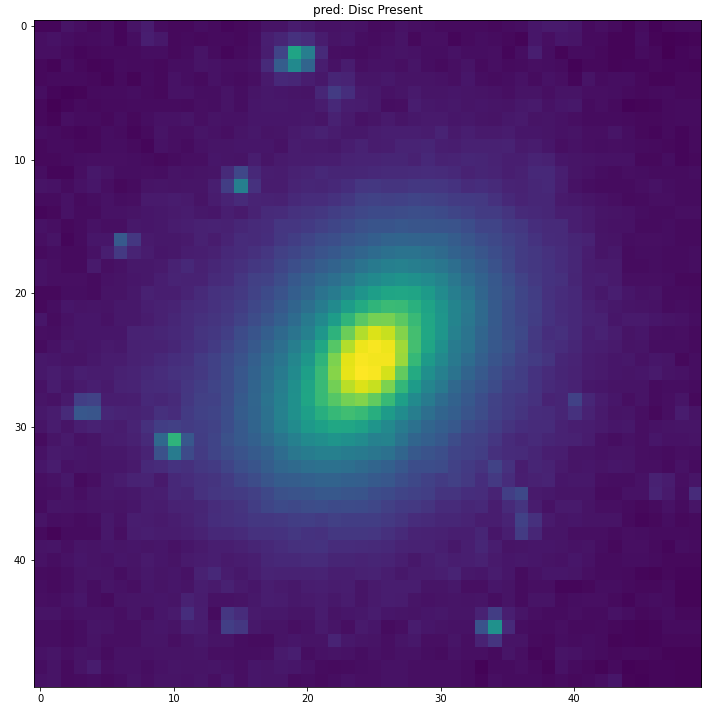

[[1 1]]
[1]
[[4.0814265e-11 1.0000000e+00]]


In [8]:
%run ..\helpers\plotting_helpers.ipynb
plot_classification_results(images=x, display_size=(1, 1), y_preds=y_pred, y_trues=[1], y_labels=("No Disc", "Disc Present"))

unique, counts = np.unique(y_pred, return_counts=True)
print(np.asarray((unique, counts)).T)
print(y_pred)
print(y_pred_prob)